In [1]:
import numpy as np
from matplotlib.pyplot import *
import basic
import prjlib

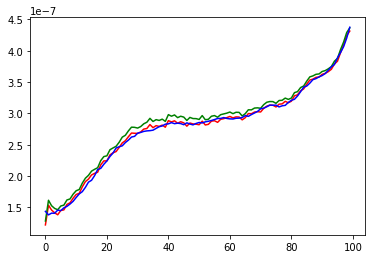

In [13]:
ps, __ = prjlib.filename_init(doreal='False',rlmin='200')
pd, __ = prjlib.filename_init(doreal='False',dodust='True',rlmin='200')
sn = 200
mb = prjlib.multipole_binning(100,spc='',lmin=1,lmax=2048)
scb = prjlib.binned_cl_rlz(ps.quad.f['EB'].cl,0,sn,mb)
mcb = np.mean(scb,axis=0)
vcb = np.std(scb,axis=0)
oRD = prjlib.binned_cl(ps.quad.f['EB'].rdn0[0],mb)
dn0 = prjlib.binned_cl(ps.quad.f['EB'].n0bl,mb)
dRD = prjlib.binned_cl(pd.quad.f['EB'].rdn0[0],mb)
ocb = prjlib.binned_cl(ps.quad.f['EB'].ocls,mb) #- oRD + dn0
dcb = prjlib.binned_cl(pd.quad.f['EB'].ocls,mb) #+ dRD - dn0
plot(oRD,'r-')
plot(dRD,'g')
plot(dn0,'b')

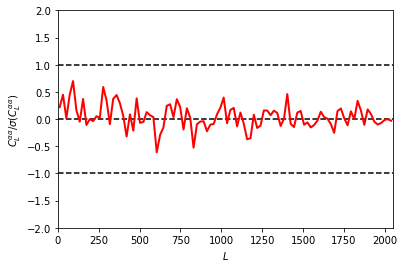

In [16]:
xlabel('$L$')
ylabel(r'$C_L^{\alpha\alpha}/\sigma(C_L^{\alpha\alpha})$')
xlim(1,2048)
ylim(-2,2)
errorbar(mb.bc,(dcb-ocb)/vcb,fmt='-',label='+dust',color='r',lw=2)
#errorbar(L,dcl,yerr=vcl,fmt='o',label='dust',color='g',lw=2)
#legend(loc=0,frameon=False)
axhline(0,ls='--',color='k')
axhline(1,ls='--',color='k')
axhline(-1,ls='--',color='k')
savefig('fig_dust.png')